In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [18]:
df_noisy = pd.read_csv("movie_revenue_noisy_dataset.csv")

In [20]:
# Step 2: Data Preprocessing
# Separate numeric and non-numeric columns
numeric_columns = df_noisy.select_dtypes(include=['number']).columns
non_numeric_columns = df_noisy.select_dtypes(exclude=['number']).columns

In [22]:
# Handle missing values in numeric columns using mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
df_noisy[numeric_columns] = numeric_imputer.fit_transform(df_noisy[numeric_columns])

In [24]:
# Handle missing values in categorical columns using most frequent value
if len(non_numeric_columns) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df_noisy[non_numeric_columns] = categorical_imputer.fit_transform(df_noisy[non_numeric_columns])

In [26]:
# One-hot encode the 'genre' column
df_noisy = pd.get_dummies(df_noisy, columns=['genre'], drop_first=True)

In [28]:
# Separate features (X) and target variable (y)
X = df_noisy.drop('revenue', axis=1)
y = df_noisy['revenue']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Step 3: KNN Regression
# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Train the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [36]:
# Make predictions using KNN
knn_predictions = knn_model.predict(X_test)

C:\Users\BARMA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [38]:
# Evaluate KNN
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

In [40]:
print("KNN Regression Results:")
print("Mean Squared Error:", knn_mse)
print("R-squared Score:", knn_r2)

KNN Regression Results:
Mean Squared Error: 8.841949111184565e+16
R-squared Score: -0.1649084840787669


In [42]:
# Step 4: Linear Regression
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
# Make predictions using Linear Regression
lin_reg_predictions = lin_reg.predict(X_test)

In [46]:
# Evaluate Linear Regression
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)


In [48]:
print("\nLinear Regression Results:")
print("Mean Squared Error:", lin_reg_mse)
print("R-squared Score:", lin_reg_r2)



Linear Regression Results:
Mean Squared Error: 7.783545953686954e+16
R-squared Score: -0.025466059988684897


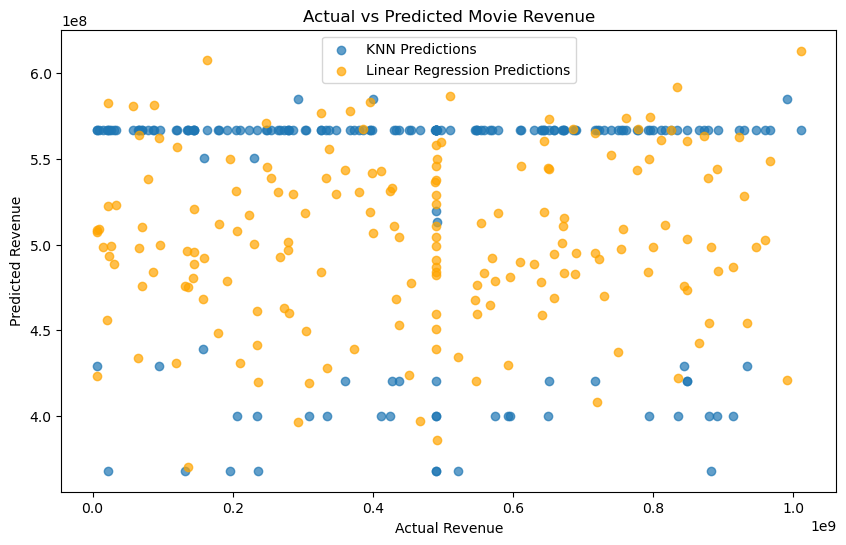

In [50]:
# Step 5: Visualizations
# Actual vs Predicted Revenue for KNN and Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, alpha=0.7, label='KNN Predictions')
plt.scatter(y_test, lin_reg_predictions, alpha=0.7, label='Linear Regression Predictions', color='orange')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Movie Revenue")
plt.legend()
plt.show()
